In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('iris.csv', names=['sl', 'sw', 'pl', 'pw', 'class'])
df.head()

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.columns

Index(['sl', 'sw', 'pl', 'pw', 'class'], dtype='object')

In [9]:
df.shape

(150, 5)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl      150 non-null    float64
 1   sw      150 non-null    float64
 2   pl      150 non-null    float64
 3   pw      150 non-null    float64
 4   class   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
df.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
df.isna().sum()

sl       0
sw       0
pl       0
pw       0
class    0
dtype: int64

### 1st way of feature encoding

In [19]:

uniques = df['class'].unique()
uniques

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
df_new = df.replace(uniques, range(1, len(uniques)+1))

In [20]:
df_new.head()


,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl      150 non-null    float64
 1   sw      150 non-null    float64
 2   pl      150 non-null    float64
 3   pw      150 non-null    float64
 4   class   150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### 2nd way of feature encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
encode = LabelEncoder()
df['class1'] = encode.fit_transform(df['class'])

In [27]:
# df.head()

,sl,sw,pl,pw,class,class1
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [28]:
df = df.drop('class', axis=1)

In [29]:
df.head()

,sl,sw,pl,pw,class1
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
scaler.fit(df.drop('class1', axis=1))

StandardScaler()

In [34]:
sc_transform = scaler.transform(df.drop('class1', axis=1))

In [35]:
sc_df = pd.DataFrame(sc_transform)

In [36]:
sc_df.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [37]:
from sklearn.model_selection import train_test_split


In [38]:
x = sc_transform

In [39]:
y = df['class1']

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3) 

In [41]:
from sklearn.neighbors import KNeighborsClassifier

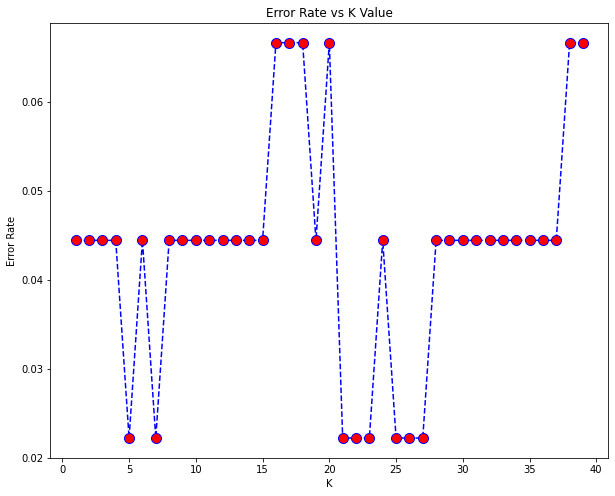

In [45]:
error_rate = []
for a in range(1, 40):
    k=a
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(y_test-pred))
    
plt.figure(figsize=(10,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [50]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [52]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

0.9555555555555556
[[15  0  0]
 [ 0 16  0]
 [ 0  2 12]]


In [54]:
import pickle
pickle.dump(knn, open('abc.sav', 'wb+'))